#### Project 07

# Introduction to Machine Learning

Joanna Farris  
10-08-2024  

---    

#### For this final project, we explore the world of machine learning by focusing on supervised learning, specifically simple linear regression. We'll train a model using all available data, then use the resulting 'best-fit' line to make predictions.

GitHub repository: https://github.com/Pojetta/datafun-07-applied  

----

In [64]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

## Part 1 - Chart a Straight Line

### Linear Relationships

To demonstrate the concept of a linear relationship, we'll use the following equation to convert temperture from Farenheit to Celcius:

c = 5/9 * (f-32)  

Where c = Celcius and f = Farenheit, plug in any value of f to solve for the value of c. 

This equation tells us that for every f value, there is a corresponding c value. Together, any f value and its corresponding c value (f, c), can be graphed as one plot point somewhere along a continuous line. Every unique value of f, will produce a unique value of c, and that pair of values, when plotted, will always fall somewhere along that line. 

In the equation y = mx + b, y = celsius, x = fahrenhait, m is the slope, and b is the value of y when you set x to zero i.e. the value of celsius when fahrenhait is 0. 

You can calculate the slope of the line with any two plotted points. And you can find the value of b by plugging in 0 for y (the resulting c value is the b value in the equation y = mx + b)



Here, we'll store each Farenheit/Celius pair as a tuple in temps. But note, instead of using the variable c in the pair, the tuple is using the conventional function notation c(f) to represent the c variable. The value is the same in both cases, but the notation c(f) in a pair (f, c(f)) highlights the fact that c is a function of f (i.e that c is dependent on f). Basically its saying, "this is the value of c, when this is the value of f." And its pronounced c of f. So for example, if the value of f is 50, the pair could be notated as (50, c(50)), where 50 = temp in farenheit, and c(50) = the [c]elcius value [of] 50 degrees [f]arenheit. 

In [65]:
# Create a lambda and use it to calculae Celsius equivalents of Fahrenheit temperatures.
c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]



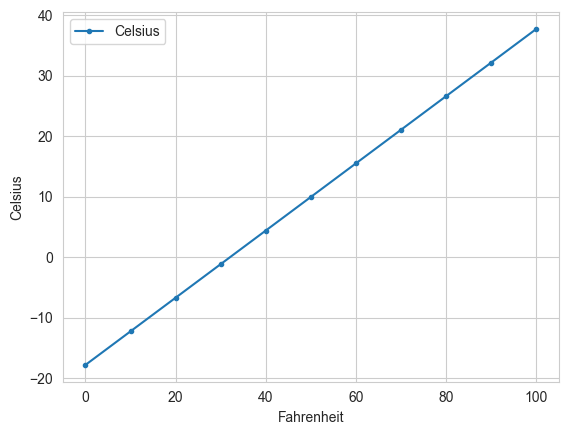

In [66]:
# Place the data in a dataframe using Pandas then use plot method to display the Fahrenheit and Celsius temperatures.
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x = 'Fahrenheit', y = 'Celsius', style = '.-')

y_label = axes.set_ylabel('Celsius')

-----

# Part 2 - Predict Avg High Temp in NYC in January

### Section 1 - Data Acquisition

In [67]:
# Load the data into a dataframe
nyc_df = pd.read_csv('nyc.csv')

### Section 2 - Data Inspection

In [68]:
# Display the head
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [69]:
# Display the tail
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [70]:
# Rename the "Value" column to "Temperature"
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

In [71]:
# Check the head again to see the column name change
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [72]:
# Check the datatype of the Date column
nyc_df.Date.dtype


dtype('int64')

In [73]:
# Call the Series method floordiv to divide by 100 and truncate the last two digits.
nyc_df.Date = nyc_df.Date.floordiv(100)

In [74]:
# Check the head again to verify this change
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [75]:
# calcuate basic statistics from Temperature column with describe()
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [76]:
# Use the linregress() function from scipys stats module to calculate the slope and intercept for a given set of points
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

In [77]:
# To get the slope
linear_regression.slope

np.float64(0.014771361132966163)

In [78]:
# to get the intercept 
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict  

To predict the average January high temperature in 2024, write a linear equation using the previously calculated slope and intercept values. This eqaution is your model.

In [79]:
# The linear equation in the form y = mx + b is called the slope-intercept form because 

# You can find the equation of a line 
# Slope-intercept is a specific form of linear equation, with a general structure of y = mx + b.
# Given the slope and y-intercept (which we just calculated), you can find the equation 
# 
# It has the following general structure
# written using just the slope and the y-intercept is in the form y = mx + b, 


# where 'linear_regression.slope' = m, 2024 = x, 'linear_regression.intercept' = b, and the output = y. 
# You can predict the average January high temperature for any year that you pass in for x.  



The resulting eqaution is your model. Ours is: 

`linear_regression.slope * (x) + linear_regression.intercept`  

You can pass any year in for x to predict the average January high temperature for that year.

In [80]:
# Use your model to predict the average high temp for January 2024
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

In [81]:
# Use your model to approximate what the average temp was in 1890
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

### Section 7 - Visualizations

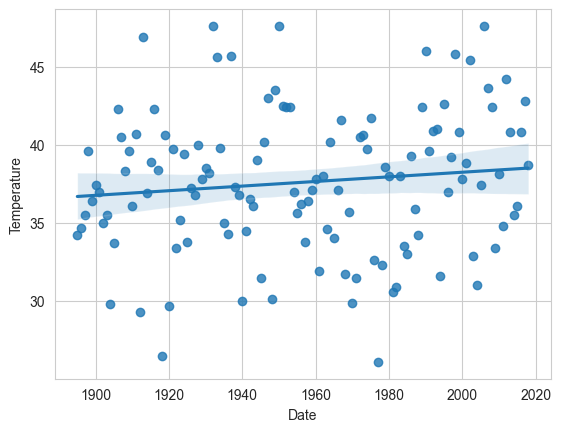

In [82]:
# Plot the average high temperature and a regression line.
 
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

(10.0, 70.0)

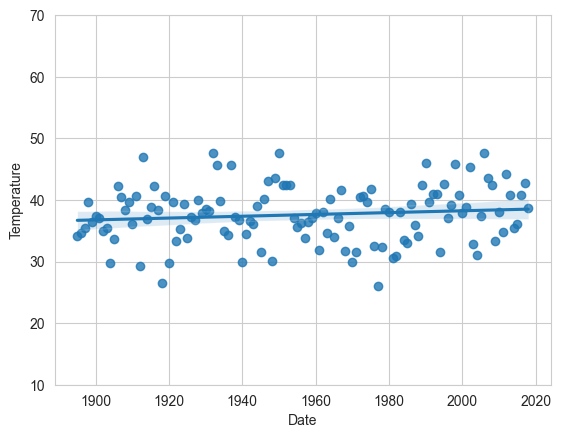

In [83]:
# Scale the y axis for a better data visualizaion.

sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

----

# Part 3 - Predict Avg High Temp in NYC in January (2nd method)

### Section 1 - Build the Model

In [84]:
# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
     nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, 
     random_state=11)

In [85]:
# Check the shape of the model.
X_train.shape

(93, 1)

In [86]:
X_test.shape

(31, 1)

#### Train the Model

In [87]:
# Create an instance of LinearRegression
linear_regression = LinearRegression()

# Fit (train) the model
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [88]:
# Optionally print specific attributes
print("Coefficients:", linear_regression.coef_)
print("Intercept:", linear_regression.intercept_)

Coefficients: [0.01939167]
Intercept: -0.30779820252656265


### Section 2 - Test the Model

In [89]:
# Use the fitted model to make predictions
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [90]:
# Define a lambda function to compute predicted values based on the linear regression equation
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

In [91]:
# Predict 2024
predict(2024)

array([38.94094855])

In [92]:
#Approximate 1890
predict(1890)

array([36.34246432])

### Section 4 - Visualizations

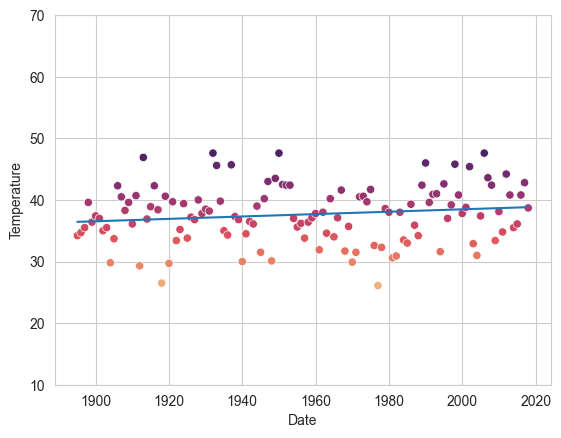

In [93]:
# Create a scatterplot of the dataset using seaborn's scatterplot function and Matplotlib's plot function.

axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
     hue='Temperature', palette='flare', legend=False)

axes.set_ylim(10, 70)

x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])

y = predict(x)

line = plt.plot(x, y)

----

# Part 4 - Add Your Insights